In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    from google.colab import drive
    my_path = 'drive/My Drive/techlabs/'
    drive.mount('/content/drive')
except:
    my_path = 'dados/'

Mounted at /content/drive


In [3]:
df = pd.read_pickle(my_path + 'final-3.6.pkl.xz')
df = df.reset_index(drop=True)
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage().sum() // (1024**2) + 1} MB')
display(df.head())

Shape: (3931570, 42)
Memory: 383 MB


,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q022,Q023,Q024,Q025,IN_ESPECIALIZADO,IN_ESPECIFICO,IN_RECURSO
0,Santarém,PA,21,M,1,3,4,NaN,NaN,1,3,1,NaN,0,Santarém,PA,472.899994,466.000000,497.299988,369.100006,0,1,780.0,D,E,A,A,7,B,A,B,C,A,A,B,D,A,B,A,False,False,False
1,Mãe do Rio,PA,16,F,1,3,1,Paragominas,PA,3,0,1,NaN,1,Mãe do Rio,PA,358.899994,495.399994,482.299988,416.500000,1,1,600.0,D,E,A,A,5,B,A,B,C,A,A,B,B,A,A,A,False,False,False
2,Paragominas,PA,18,F,1,1,1,Paragominas,PA,2,0,3,1,0,Paragominas,PA,574.200012,538.700012,582.599976,571.500000,0,1,640.0,H,E,A,D,3,C,D,E,E,C,A,B,D,A,C,B,False,False,False
3,Ananindeua,PA,31,M,1,1,1,Belém,PA,1,7,1,1,0,Belém,PA,522.000000,592.599976,582.000000,605.299988,1,1,580.0,C,C,C,D,5,C,A,B,C,A,A,B,D,A,A,A,False,False,False
4,Marabá,PA,30,F,2,3,1,Marabá,PA,1,10,1,1,0,Marabá,PA,407.399994,480.100006,464.299988,581.500000,1,1,360.0,B,B,A,A,4,C,A,B,B,A,B,B,B,A,A,B,False,False,False


***Colunas que eu fiquei para analisar***

'Q001', 'Q002', 'Q003', 'Q004','Q022', 'Q023', 'Q024','Q025','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO'

|Coluna|Descrição|
|---|---|
|Q001|Até que série seu pai, ou o homem responsável por você, estudou?|
|Q002|Até que série sua mãe, ou a mulher responsável por você, estudou?|
|Q003|Ocupação do seu pai ou do homem responsável por você.|
|Q004|Ocupação da sua mãe ou da mulher responsável por você.|
|Q022|Na sua residência tem telefone celular?|
|Q023|Na sua residência tem telefone fixo?|
|Q024|Na sua residência tem computador?|
|Q025|Na sua residência tem acesso à Internet?|
|TP_ST_CONCLUSAO|Situação de conclusão do Ensino Médio|
|TP_ANO_CONCLUIU|Ano de Conclusão do Ensino Médio|
|IN_TREINEIRO|Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos|


In [4]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [5]:
colunas = [
    'Q001', 'Q002', 'Q003', 'Q004','Q022', 'Q023',
    'Q024','Q025','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO'
]

In [6]:
labels = {
    'Q001': 'Até que série seu pai, ou o homem responsável por você, estudou?',
    'Q002': 'Até que série sua mãe, ou a mulher responsável por você, estudou?',
    'Q003': 'Ocupação do seu pai ou do homem responsável por você.',
    'Q004': 'Ocupação da sua mãe ou da mulher responsável por você.',
    'Q022': 'Na sua residência tem telefone celular?',
    'Q023': 'Na sua residência tem telefone fixo?',
    'Q024': 'Na sua residência tem computador?',
    'Q025': 'Na sua residência tem acesso à Internet?',
    'TP_ST_CONCLUSAO': 'Situação de conclusão do Ensino Médio',
    'TP_ANO_CONCLUIU': 'Ano de Conclusão do Ensino Médio',
    'IN_TREINEIRO': 'Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos'
}

In [7]:
import json

with open(my_path + 'categorias.json', 'r') as f:
    c = json.load(f)
    categorias = {
        **c['participante'], **c['escola'], **c['especializado'], **c['especifico'],
        **c['recurso'], **c['local_prova'], **c['prova'], **c['redacao'], **c['socioeconomico']
    }

## Análises

In [8]:
def cria_tabela(variavel, acumulado=False):
    tabela = pd.DataFrame({
        'descricao': list(categorias[variavel].values()),
        'frequencia': list(df[variavel].value_counts().sort_index()),
        'porcentagem': list(df[variavel].value_counts(normalize=True).sort_index())
    })
    if acumulado:
        tabela['acumulado'] = tabela['porcentagem'].cumsum()
    print(f'{variavel} {labels.get(variavel, "")}')
    display(tabela)

In [9]:
def cria_tabela_AB(variavelA, variavelB, acumulado=False):
    tabela = pd.DataFrame({
        'descricao': list(categorias[variavelA].values())
    })
    tabela['freq_'+variavelA] = list(df[variavelA].value_counts().sort_index())
    tabela['porcentagem_'+variavelA] = list(df[variavelA].value_counts(normalize=True).sort_index())
    if acumulado:
        tabela['acum_'+variavelA] = tabela['porcentagem_'+variavelA].cumsum()

    tabela['freq_'+variavelB] = list(df[variavelB].value_counts().sort_index())
    tabela['porcentagem_'+variavelB] = list(df[variavelB].value_counts(normalize=True).sort_index())
    if acumulado:
        tabela['acum_'+variavelB] = tabela['porcentagem_'+variavelB].cumsum()
    print(f'{variavelA} {labels.get(variavelA, "")}')
    print(f'{variavelB} {labels.get(variavelB, "")}')
    display(tabela)

Q001 Até que série seu pai, ou o homem responsável por você, estudou?
Q002 Até que série sua mãe, ou a mulher responsável por você, estudou?


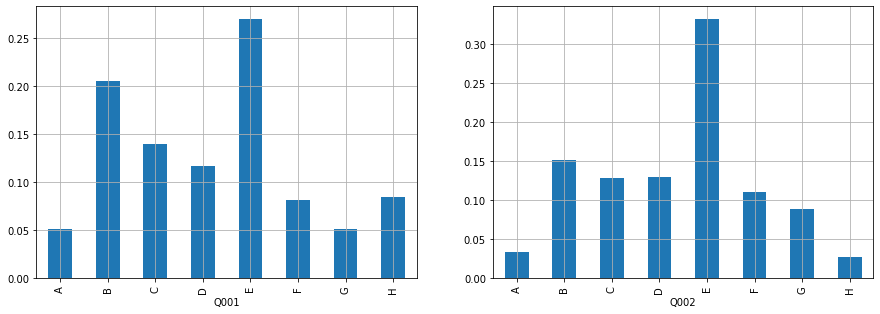

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q001'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

variavel = 'Q002'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

plt.show()

In [11]:
cria_tabela_AB('Q001', 'Q002', True)

Q001 Até que série seu pai, ou o homem responsável por você, estudou?
Q002 Até que série sua mãe, ou a mulher responsável por você, estudou?


,descricao,freq_Q001,porcentagem_Q001,acum_Q001,freq_Q002,porcentagem_Q002,acum_Q002
0,Nunca estudou.,200822,0.051079,0.051079,131220,0.033376,0.033376
1,Não completou a 4ª série/5º ano do Ensino Fund...,807446,0.205375,0.256454,593828,0.151041,0.184417
2,"Completou a 4ª série/5º ano, mas não completou...",549840,0.139853,0.396307,505097,0.128472,0.312889
3,Completou a 8ª série/9º ano do Ensino Fundamen...,460560,0.117144,0.513451,508328,0.129294,0.442183
4,"Completou o Ensino Médio, mas não completou a ...",1060270,0.269681,0.783132,1305828,0.332139,0.774322
5,"Completou a Faculdade, mas não completou a Pós...",321150,0.081685,0.864817,434860,0.110607,0.884929
6,Completou a Pós-graduação.,201325,0.051207,0.916024,346708,0.088186,0.973115
7,Não sei.,330157,0.083976,1.000000,105701,0.026885,1.000000


Q003 Ocupação do seu pai ou do homem responsável por você.
Q004 Ocupação da sua mãe ou da mulher responsável por você.


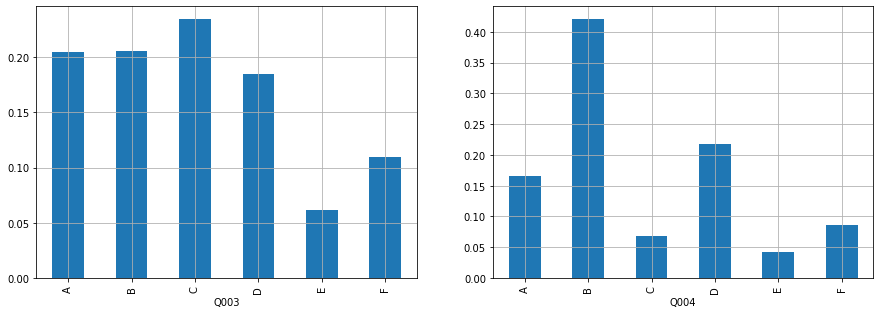

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q003'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

variavel = 'Q004'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

plt.show()

In [13]:
cria_tabela_AB('Q003', 'Q004')

Q003 Ocupação do seu pai ou do homem responsável por você.
Q004 Ocupação da sua mãe ou da mulher responsável por você.


,descricao,freq_Q003,porcentagem_Q003,freq_Q004,porcentagem_Q004
0,"Grupo 1: Lavrador, agricultor sem empregados, ...",803315,0.204324,651883,0.165807
1,"Grupo 2: Diarista, empregado doméstico, cuidad...",808862,0.205735,1652669,0.420359
2,"Grupo 3: Padeiro, cozinheiro industrial ou em ...",920813,0.234210,266293,0.067732
3,Grupo 4: Professor (de ensino fundamental ou m...,725738,0.184592,857936,0.218217
4,"Grupo 5: Médico, engenheiro, dentista, psicólo...",240718,0.061227,166331,0.042307
5,Não sei.,432124,0.109911,336458,0.085579


Q022 Na sua residência tem telefone celular?
Q023 Na sua residência tem telefone fixo?


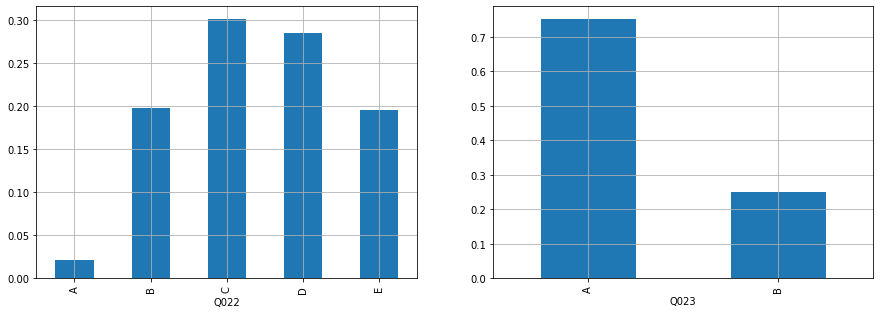

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q022'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

variavel = 'Q023'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

plt.show()

In [15]:
df['Q022'].value_counts(normalize=True)

C    0.301213
D    0.284752
B    0.197698
E    0.195314
A    0.021023
Name: Q022, dtype: float64

Q024 Na sua residência tem computador?
Q025 Na sua residência tem acesso à Internet?


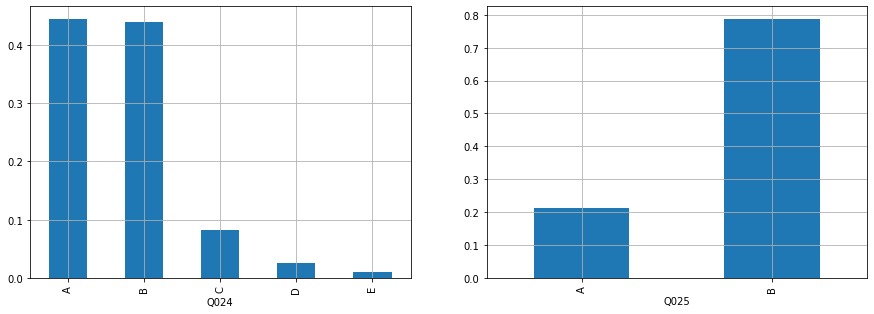

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q024'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

variavel = 'Q025'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

plt.show()

In [17]:
cond1=df['Q024']=='A'
cond2=df['Q025']=='B'

df['internet_sem_pc'] = np.where(cond1 & cond2, True, False)

In [18]:
cond1=df['Q024']!='A'
cond2=df['Q025']=='B'

df['internet_com_pc'] = np.where(cond1 & cond2, True, False)

In [19]:
df['internet_com_pc'].value_counts(normalize=True)

True     0.52999
False    0.47001
Name: internet_com_pc, dtype: float64

In [20]:
df['internet_sem_pc'].value_counts(normalize=True)

False    0.743693
True     0.256307
Name: internet_sem_pc, dtype: float64

In [21]:
df['TP_ANO_CONCLUIU'].value_counts()

0     1927986
1      515248
2      331091
13     249665
3      219469
4      159666
5      121981
6       93539
7       77468
8       60092
9       53993
10      47177
11      38558
12      35637
Name: TP_ANO_CONCLUIU, dtype: int64

In [22]:
cria_tabela('TP_ANO_CONCLUIU')

TP_ANO_CONCLUIU Ano de Conclusão do Ensino Médio


,descricao,frequencia,porcentagem
0,Não informado,1927986,0.490386
1,2018,515248,0.131054
2,2017,331091,0.084213
3,2016,219469,0.055822
4,2015,159666,0.040611
5,2014,121981,0.031026
6,2013,93539,0.023792
7,2012,77468,0.019704
8,2011,60092,0.015284
9,2010,53993,0.013733


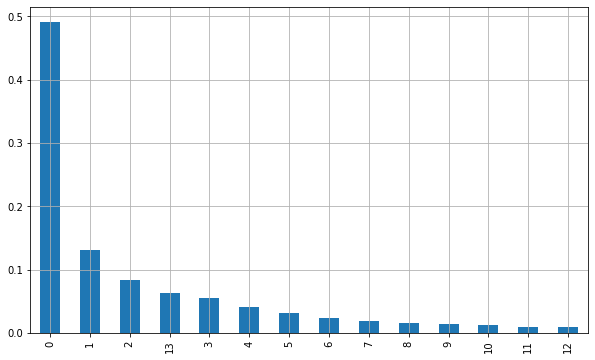

In [23]:
df['TP_ANO_CONCLUIU'].value_counts(normalize=True).plot.bar(figsize=(10,6), grid=True)

TP_ST_CONCLUSAO Situação de conclusão do Ensino Médio
IN_TREINEIRO Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos


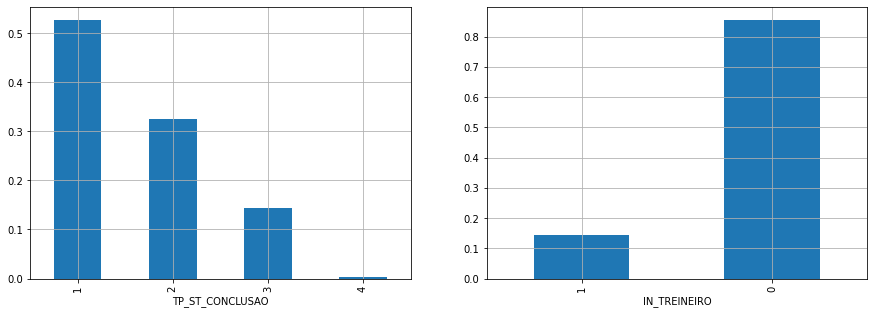

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'TP_ST_CONCLUSAO'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

variavel = 'IN_TREINEIRO'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)
print(f'{variavel} {labels.get(variavel, "")}')

plt.show()

In [25]:
cria_tabela('TP_ST_CONCLUSAO')

TP_ST_CONCLUSAO Situação de conclusão do Ensino Médio


,descricao,frequencia,porcentagem
0,Já concluí o Ensino Médio,2073450,0.527385
1,Estou cursando e concluirei o Ensino Médio em ...,1279580,0.325463
2,Estou cursando e concluirei o Ensino Médio apó...,566288,0.144036
3,Não concluí e não estou cursando o Ensino Médio,12252,0.003116


In [26]:
cria_tabela('IN_TREINEIRO')

IN_TREINEIRO Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos


,descricao,frequencia,porcentagem
0,Sim,566288,0.144036
1,Não,3365282,0.855964


## Correlações

In [27]:
def plota_boxplot_provas(variavel, rotate=False):
    fig, axs = plt.subplots(1, 5, figsize=(24,5))
    for idx, p in enumerate(provas):
        ax = sns.boxplot(x=variavel, y=p, data=df, ax=axs[idx])
        ax.set_ylim(-50, 1050)
        ax.set_ylabel('')
        ax.set_xlabel(p)
    if rotate:
        plt.draw()
        for ax in axs:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    fig.suptitle(f'{variavel} {labels.get(variavel, "")}')

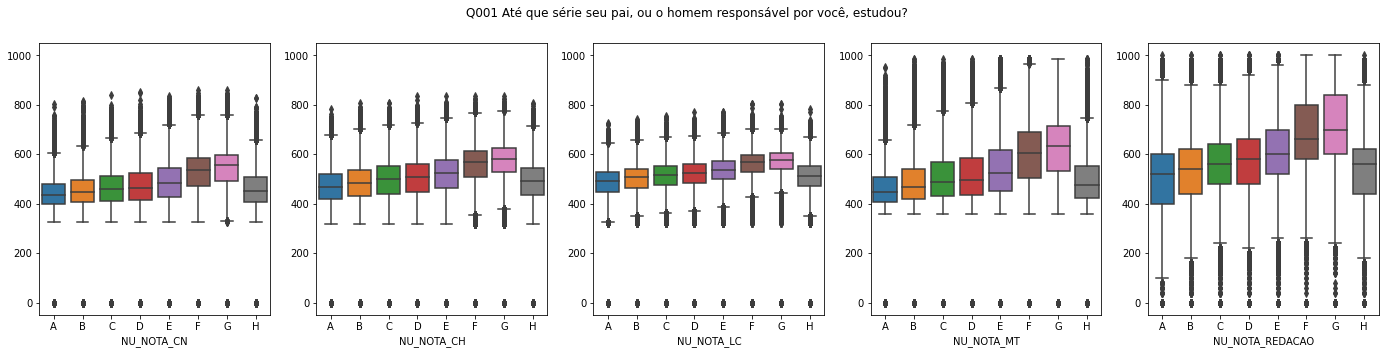

In [28]:
#sns.boxplot(x='Q001',y = 'NU_NOTA_CH', data=df)
plota_boxplot_provas('Q001')

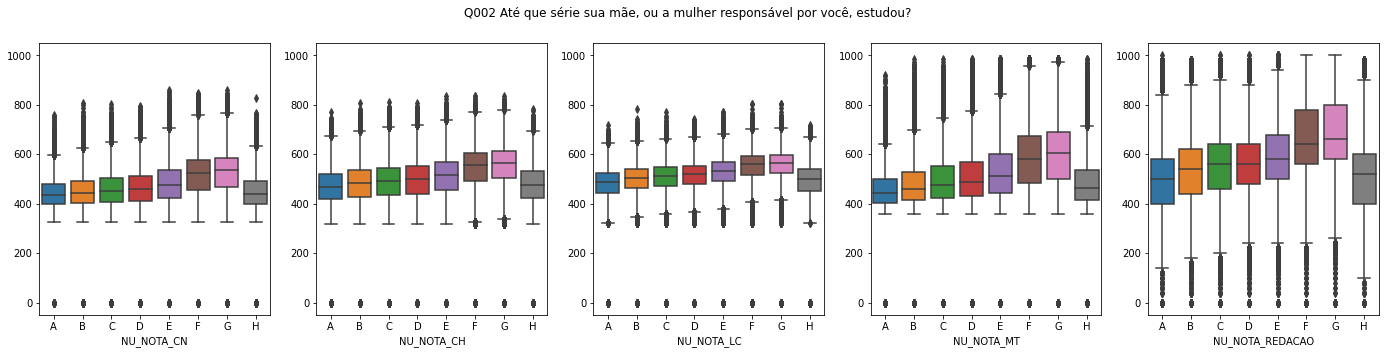

In [29]:
#sns.boxplot(x='Q002',y = 'NU_NOTA_REDACAO', data=df)
plota_boxplot_provas('Q002')

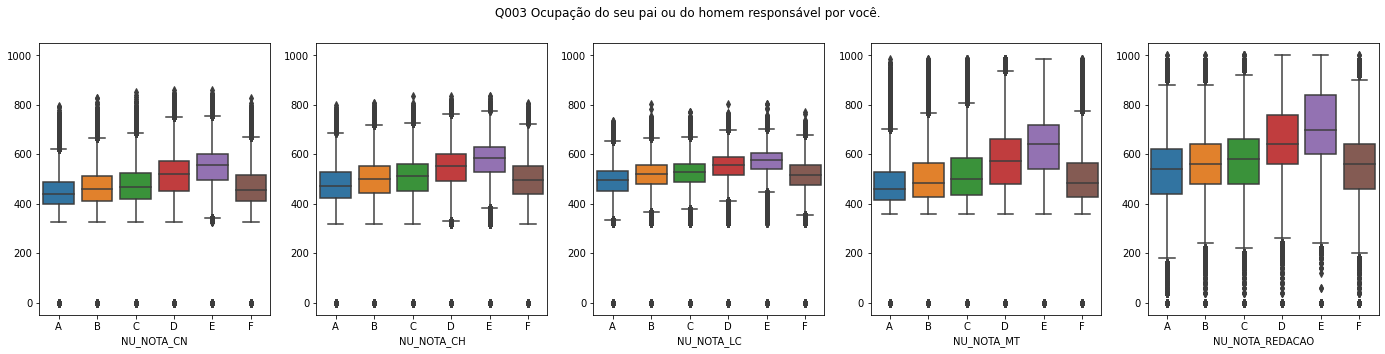

In [30]:
#sns.boxplot(x='Q003',y = 'NU_NOTA_LC', data=df)
plota_boxplot_provas('Q003')

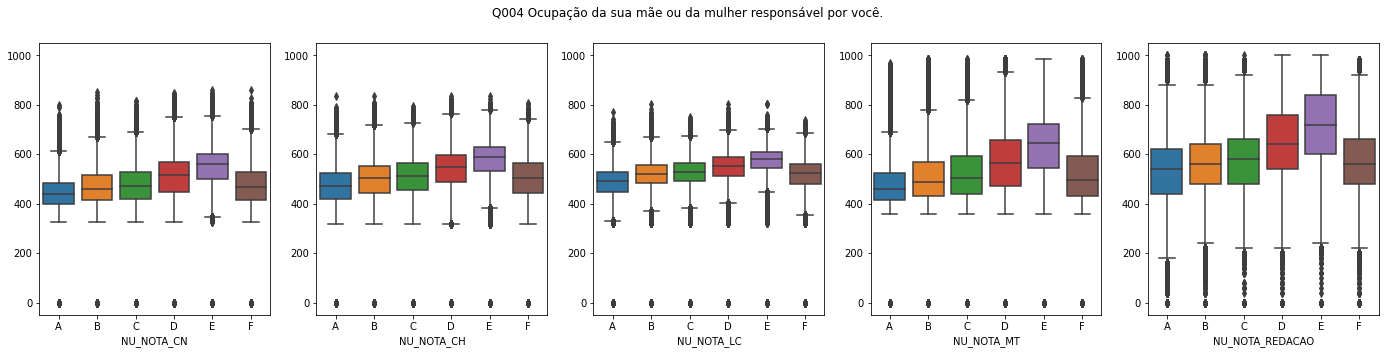

In [31]:
#sns.boxplot(x='Q004',y = 'NU_NOTA_LC', data=df)
plota_boxplot_provas('Q004')

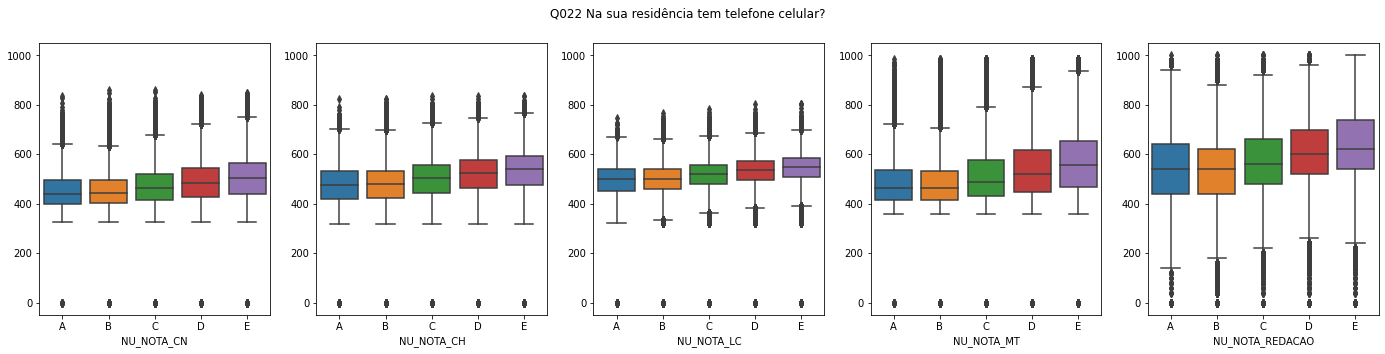

In [32]:
#sns.boxplot(x='Q022',y = 'NU_NOTA_REDACAO', data=df)
plota_boxplot_provas('Q022')

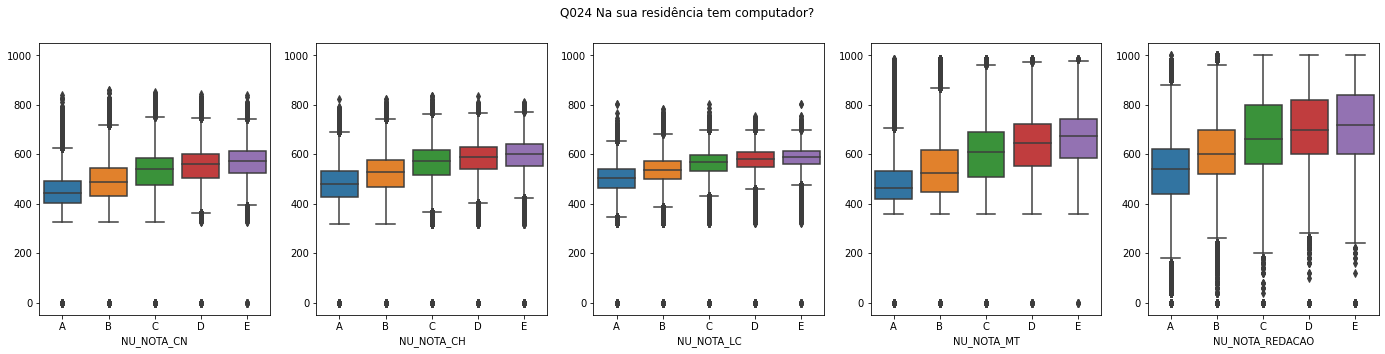

In [33]:
#sns.boxplot(x='Q024',y = 'NU_NOTA_MT', data=df)
plota_boxplot_provas('Q024')

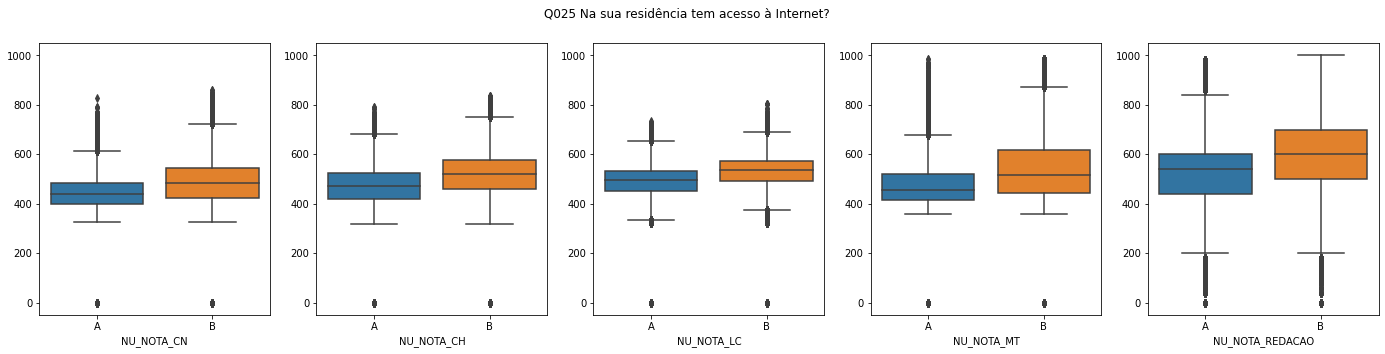

In [34]:
#sns.boxplot(x='Q025',y = 'NU_NOTA_MT', data=df)
plota_boxplot_provas('Q025')

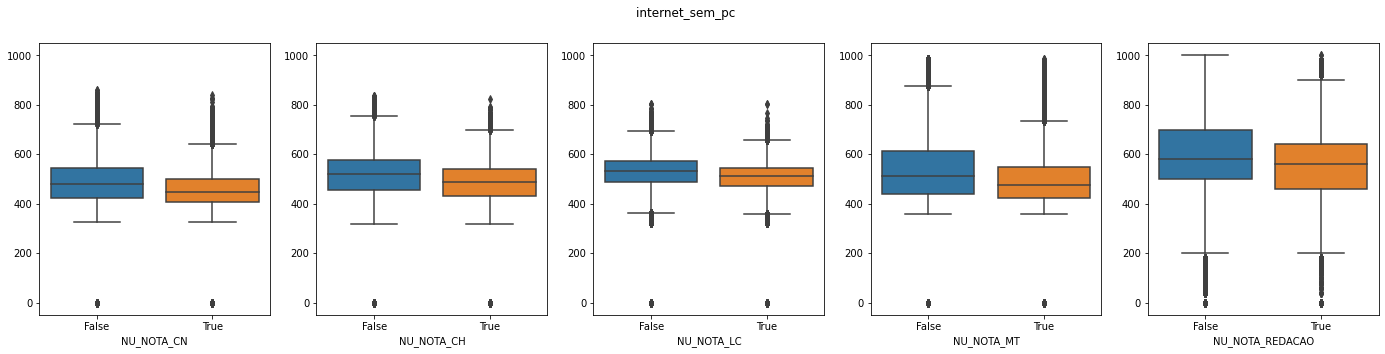

In [35]:
#sns.boxplot(x='internet_sem_pc',y = 'NU_NOTA_REDACAO', data=df)
plota_boxplot_provas('internet_sem_pc')

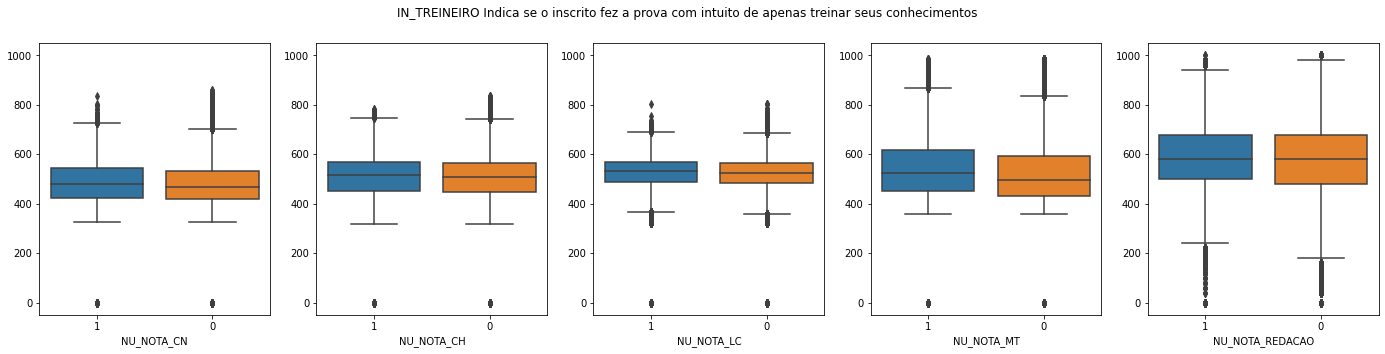

In [36]:
#sns.boxplot(x='IN_TREINEIRO',y = 'NU_NOTA_CN', data=df)
plota_boxplot_provas('IN_TREINEIRO')

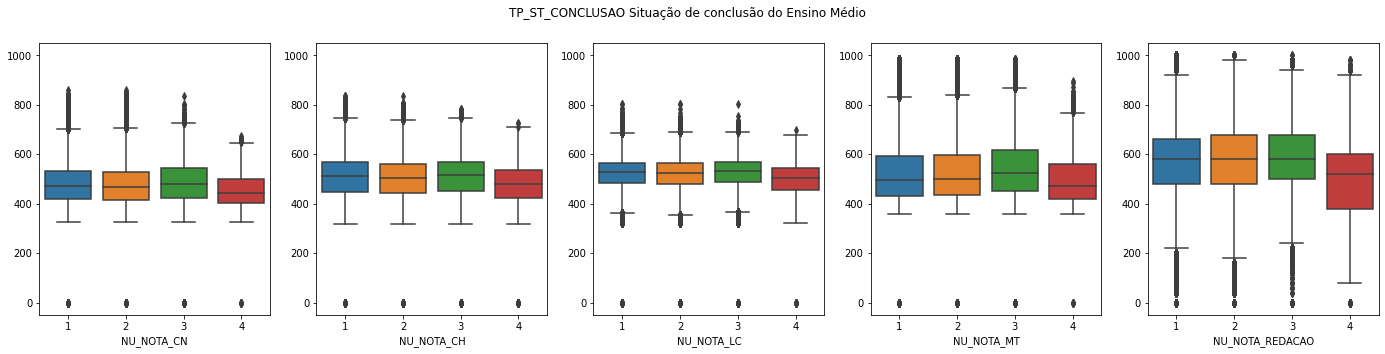

In [37]:
#sns.boxplot(x='TP_ST_CONCLUSAO',y = 'NU_NOTA_CN', data=df)
plota_boxplot_provas('TP_ST_CONCLUSAO')

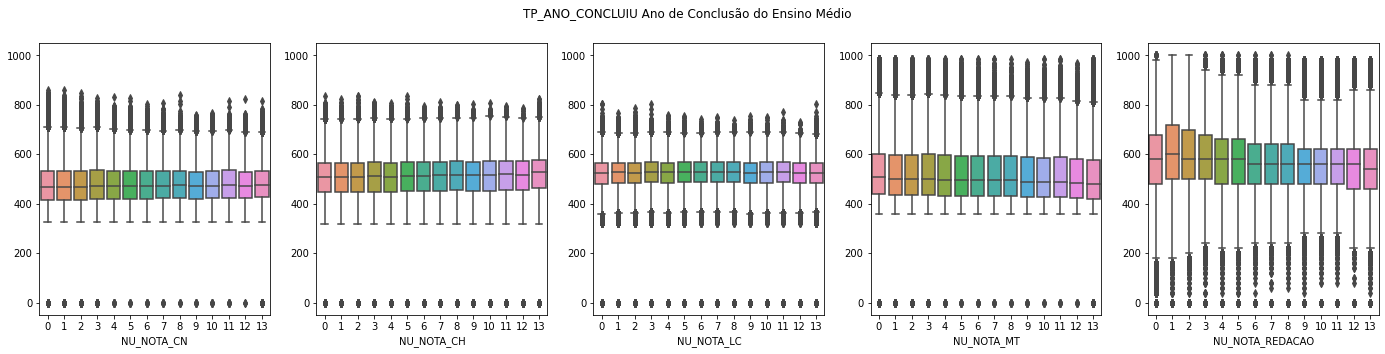

In [38]:
#sns.boxplot(x='TP_ANO_CONCLUIU',y = 'NU_NOTA_CN', data=df)
plota_boxplot_provas('TP_ANO_CONCLUIU')

## Conclusões

**Distribuições e características**

- O pai dos participantes tem níveis de escolaridade bem variados, 50% não completou o ensino médio e a maior parte deles (26%) completou apenas o ensino médio, mas não uma graduação.
- Quase 80% das mães dos participantes tem máximo ensino médio completo, sendo que novamente a maior parte (33%) completou o ensino médio, mas não uma graduação.
- O cargo do pai tem uma grande variabilidade, sendo que somente 6% pertence ao grupo E, o qual tem profissões de maior status.
- Grande parte das mães (42%) estão no grupo B, o qual tem prestadores de serviços de menor destaque financeiro como faxineira, babá e cozinheira.
- Quase todos os participantes (97%) tem celular na residência, mas cerca de 25% não tem telefone fixo (mostrando a mudança de importância de uma linha fixa)
- Mais de 40% não tem computador em casa, mas somente 20% não tem acesso a internet
- O ano de conclusão do ensino médio não foi preenchido por quase 50% dos estudantes o que dificulta a análise.
- Mais de 50% dos candidatos já concluíram o ensino médio e 14% está fazendo a prova como treineiro.

**Correlação**

- O nivel de graduação do pai tem uma relação muito forte com todas as notas
- O nivel de graduação da mãe também tem uma relação positiva com as notas, mas mais fraca que a do pai
- Os três primeiros grupos de profissões não apresentam grandes diferenças, mas o D e E sim para pai e mãe
- Quem não tem computador tem um desempenho sensivelmente pior que os demais
- O acesso à internet não teve uma relação mais relevante com as notas de matemática e redação
- Quem é treineiro e quem conclui ou concluirá o ensino médio no ano do enem não obteve diferenças significativas no desempenho.